In [75]:
# Oppg 2
# import data
import pandas as pd

viner = pd.read_csv("viner.csv", sep='\t')
saker = pd.read_csv("saker.csv", sep=';')

In [76]:
saker.head(10)

,Sak,1980,1990,2000,2010,2020
0,Alkohol,14,1,1,0,0
1,Målform,7,4,15,9,1
2,Territorielt,0,17,0,2,0
3,Miljø,1,0,0,3,0


In [77]:
# hent specific celle, rad, kollonne
saker.iloc[1, 2]

4

In [78]:
# hent kolonne
saker['2010']

0    0
1    9
2    2
3    3
Name: 2010, dtype: int64

In [79]:
# Hent rad 
rad = saker[saker['Sak'] == 'Målform']
rad

,Sak,1980,1990,2000,2010,2020
1,Målform,7,4,15,9,1


In [80]:
# hent rader basert på informasjon
saker[saker['Sak'].isin(['Miljø', 'Alkohol'])][['1980', '1990']]

,1980,1990
0,14,1
3,1,0


In [81]:
# find average
saker[['1980', '1990', '2000', '2010', '2020']].mean()

1980    5.50
1990    5.50
2000    4.00
2010    3.50
2020    0.25
dtype: float64

In [82]:
# long representation
lang = saker.melt(id_vars='Sak', var_name='År', value_name='Antall')
lang

,Sak,År,Antall
0,Alkohol,1980,14
1,Målform,1980,7
2,Territorielt,1980,0
3,Miljø,1980,1
4,Alkohol,1990,1
5,Målform,1990,4
6,Territorielt,1990,17
7,Miljø,1990,0
8,Alkohol,2000,1
9,Målform,2000,15


In [83]:
# total
lang.groupby('Sak').sum()

C:\Users\Jakoa\AppData\Local\Temp\ipykernel_4320\1340527347.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  lang.groupby('Sak').sum()


,Antall
Sak,
Alkohol,16
Miljø,4
Målform,36
Territorielt,19


In [84]:
# antall basert på årstall

def skrivÅr(n):
    print(f'I {n} var det:')
    for i in saker.index:
        rad = saker.iloc[i]
        print(f'{rad[n]} avstemmninger om {rad["Sak"]}')


skrivÅr('1980')

I 1980 var det:
14 avstemmninger om Alkohol
7 avstemmninger om Målform
0 avstemmninger om Territorielt
1 avstemmninger om Miljø


In [85]:
# make thing
d = {'Sak': ['Krets', 'Annet'], '1980': [1, 0], '1990': [2, 0], '2000': [1, 0], '2010': [2, 0], '2020': [0, 0]}
fleresaker = pd.DataFrame(d)
fleresaker

,Sak,1980,1990,2000,2010,2020
0,Krets,1,2,1,2,0
1,Annet,0,0,0,0,0


In [86]:
# Utvid dataframe
saker = pd.concat([saker, fleresaker])
saker.reset_index(inplace=True, drop=True)
saker

,Sak,1980,1990,2000,2010,2020
0,Alkohol,14,1,1,0,0
1,Målform,7,4,15,9,1
2,Territorielt,0,17,0,2,0
3,Miljø,1,0,0,3,0
4,Krets,1,2,1,2,0
5,Annet,0,0,0,0,0


In [87]:
# utvid saker
flereår = pd.read_csv('flereår.csv', sep=';')
saker = pd.concat([saker, flereår[['1972', '1994']]], axis=1)
saker.reset_index(inplace=True, drop=True)
saker

,Sak,1980,1990,2000,2010,2020,1972,1994
0,Alkohol,14,1,1,0,0,12,0
1,Målform,7,4,15,9,1,15,4
2,Territorielt,0,17,0,2,0,6,1
3,Miljø,1,0,0,3,0,0,0
4,Krets,1,2,1,2,0,3,1
5,Annet,0,0,0,0,0,0,0


In [88]:
saker.set_index('Sak', inplace=True)
# saker.drop(columns=['Sak'],inplace=True)
saker

,1980,1990,2000,2010,2020,1972,1994
Sak,,,,,,,
Alkohol,14,1,1,0,0,12,0
Målform,7,4,15,9,1,15,4
Territorielt,0,17,0,2,0,6,1
Miljø,1,0,0,3,0,0,0
Krets,1,2,1,2,0,3,1
Annet,0,0,0,0,0,0,0


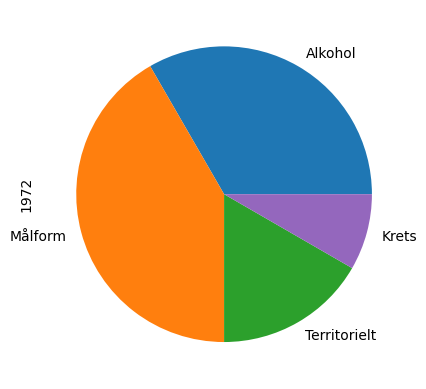

In [89]:
import matplotlib.pyplot as plt

saker['1972'].plot.pie()
plt.show()

In [90]:
# Akkumuler
def akkSum(r):
    rad = r.copy()
    for i in range(1, len(rad.index)):
        rad.iloc[i] = rad.iloc[i] + rad.iloc[i - 1]
    return rad


akkumulert = saker.transform(akkSum, axis=1)
akkumulert

,1980,1990,2000,2010,2020,1972,1994
Sak,,,,,,,
Alkohol,14,15,16,16,16,28,28
Målform,7,11,26,35,36,51,55
Territorielt,0,17,17,19,19,25,26
Miljø,1,1,1,4,4,4,4
Krets,1,3,4,6,6,9,10
Annet,0,0,0,0,0,0,0


In [91]:
# Oppg 3
# A)

vin = pd.read_csv('viner.csv', sep='\t')
distrikt = pd.read_csv('distrikter.csv', sep='\t')
land = pd.read_csv('land.csv', sep='\t')
vin

,Vin,Årgang,Pris,Antall
0,Gran Feudo Crianza,2016,200,4
1,Gran Feudo Crianza,2015,220,1
2,Ch. Bonnet Reserve,2014,250,7
3,Ch. Bonnet Reserve,2010,190,3
4,Ch. Bonnet Reserve,2017,200,4
5,Guerrini Forteguerra Chianti,2011,280,9
6,Periquita,2010,420,3
7,Periquita,2014,310,5
8,Canaletteo Chianti,2017,170,12
9,Trimbach Riesling,2018,190,11


In [92]:
distrikt

,Vin,Distrikt
0,Gran Feudo Crianza,Navarra
1,Ch. Bonnet Reserve,Bordeaux
2,Guerrini Forteguerra Chianti,Toscana
3,Periquita,Setubal
4,Canaletteo Chianti,Toscana
5,Trimbach Riesling,Alsace
6,Cono Sur Cosecha Noble Late Riesling,Bio-Bio Valley
7,Kloster Eberbach Marcobrunn Riesling,RheinGau


In [93]:
land

,Distrikt,Land
0,Navarra,Spania
1,Bordeaux,Frankrike
2,Toscana,Italia
3,Setubal,Portugal
4,Alsace,Frankrike
5,Bio-Bio Valley,Chile
6,RheinGau,Tyskland


In [94]:
snittPris = vin['Pris'].mean()
overSnitt = vin[vin['Pris'] > snittPris]  # [['Vin','Årgang', 'Pris']] <- Not needed imo
overSnitt

,Vin,Årgang,Pris,Antall
5,Guerrini Forteguerra Chianti,2011,280,9
6,Periquita,2010,420,3
7,Periquita,2014,310,5
11,Kloster Eberbach Marcobrunn Riesling,2015,510,2
12,Kloster Eberbach Marcobrunn Riesling,2017,450,4


In [95]:
kobling1 = vin.merge(distrikt)
kobling2 = kobling1.merge(land)
fransk = kobling2[kobling2['Land'] == 'Frankrike']['Vin'].drop_duplicates()

In [96]:
kobling2

,Vin,Årgang,Pris,Antall,Distrikt,Land
0,Gran Feudo Crianza,2016,200,4,Navarra,Spania
1,Gran Feudo Crianza,2015,220,1,Navarra,Spania
2,Ch. Bonnet Reserve,2014,250,7,Bordeaux,Frankrike
3,Ch. Bonnet Reserve,2010,190,3,Bordeaux,Frankrike
4,Ch. Bonnet Reserve,2017,200,4,Bordeaux,Frankrike
5,Guerrini Forteguerra Chianti,2011,280,9,Toscana,Italia
6,Canaletteo Chianti,2017,170,12,Toscana,Italia
7,Periquita,2010,420,3,Setubal,Portugal
8,Periquita,2014,310,5,Setubal,Portugal
9,Trimbach Riesling,2018,190,11,Alsace,Frankrike


In [97]:
fransk

2    Ch. Bonnet Reserve
9     Trimbach Riesling
Name: Vin, dtype: object

In [98]:
# c) Finn antallet viner fra hvert distrikt
kobling10 = vin.merge(distrikt)
antall = kobling10.groupby('Distrikt')['Distrikt'].count()
antall

Distrikt
Alsace            1
Bio-Bio Valley    1
Bordeaux          3
Navarra           2
RheinGau          2
Setubal           2
Toscana           2
Name: Distrikt, dtype: int64

In [99]:
# d) Filen terningkast.csv er lastet ned fra et mat-magasin sin vintest.
terning = pd.read_csv('terningkast.csv', sep=';')
vinÅrPar = terning['Vin'].str.split('/')
terning['Vin'] = vinÅrPar.str.get(0)
# terning['År'] = vinÅrPar.str.get(1)
terning.insert(1, column='År', value=vinÅrPar.str.get(1))
terning.sort_values(by='Terningkast', inplace=True, ascending=False)
terning.reset_index(drop=True, inplace=True)

In [100]:
terning

,Vin,År,Terningkast
0,Felsina Berardenga,2012,6
1,Periquita,2014,6
2,Gran Feudo Crianza,2015,6
3,Colombier Crozes Hermitage,2019,6
4,Passorosso,2014,5
5,Ch. Bonnet Reserve,2014,5
6,Moonlight Race,2019,5
7,Hawkes Bay Syrah,2020,5
8,Monest,2021,4
9,Langhe Nebbiolo,2019,4


In [106]:
# e)
terning['År'] = terning['År'].astype('int')
kobling11 = vin.merge(terning, left_on=['Vin', 'Årgang'], right_on=['Vin', 'År'])
anbefalt2 = kobling11[kobling11['Terningkast'] > 4][['Vin', 'År']]  # vin[vin['Pris'] > snittPris]
anbefalt2

,Vin,År
0,Gran Feudo Crianza,2015
1,Ch. Bonnet Reserve,2014
2,Periquita,2014


In [107]:
terning['År']=terning['År'].astype('int') #År er lagret som tekst pga .str.split
kobling=vin.merge(terning, left_on=['Vin','Årgang'], right_on=['Vin','År'])
anbefalt=kobling[kobling['Terningkast']>4][['Vin','Årgang']]

In [103]:
anbefalt

,Vin,Årgang
0,Gran Feudo Crianza,2015
1,Ch. Bonnet Reserve,2014
2,Periquita,2014
